# 1.) Rozkład SNPów w intronach bez podziału na chromosomy, bez podziału na geny

## zczytwanie danych

In [1]:
import pandas as pd
import numpy as np


vep = pd.read_csv("C:/Users/Lenovo/Desktop/STUDIA/BIOINFORMATYKA/MASTER/after_vep.out", sep ="\t", skiprows=35)
#print(vep.head(50))
#print(vep["Extra"].head(50))
#print(vep["Gene"].head(50), vep["Extra"].head(50))

## ekstrakcja infromacji o położeniu SNPu

In [2]:
# informacja o tym w jakim SNPie jest intron znajduje się w kolumnie "Extra", jednak nie jest tam jedyną informacją

extra_list = vep['Extra'].to_list()  # zamiana kolumny z dataframu na listę


vep_introns_and_exons = []    # w tej liście będą znajdywać się tylko numery intronów i exonów z listy "extra_list"


for i in range(0, len(extra_list)):
    vep_introns_and_exons.append(extra_list[i][-10:])    # zapełnianie listy vep_introns_and_exons
    


#print(vep_introns_and_exons)

## odfiltrowanie intronów

In [3]:
vep_only_introns = list(filter(lambda x: 'INTRON' in x, vep_introns_and_exons))  # w listy "vep_introns_and_exons" odfiltrowywane są jedynie elementy zawierająct string "INTRON" w sobie 


vep_intron_positions = []   # w tej liście będą znajdywały się same pozycje SNPu w intronie bez nagłówka "INTRON"

for i in range(0, len(vep_only_introns)):
    vep_intron_positions.append(vep_only_introns[i][-3:])   # zapełnianie listy "vep_intron_positions"

print(vep_intron_positions)

['2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '2/2', '5/5', '4/5', '4/5', '4/5', '4/5', '4/5', '4/5', '4/5', '4/5', '4/5', '4/5', '4/5', '4/5', '4/5', '4/5', '1/1', '4/5', '4/5', '4/5', '4/5', '4/5', '4/5', '4/5', '4/5', '2/5', '2/5', '2/5', '2/5', '4/4', '4/4', '4/4', '3/4', '3/4', '3/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4'

WYJAŚNIENIE OUTPUTU:________________________________________________________________________________________________________

2/2 ozancza tyle, że SNP jest w drugim intronie z dwóch intronów w tym genie (czyli ten gen ma w sumie dwa introny)



PROBLEM:____________________________________________________________________________________________________________________

Jak uzyskać informacje o długości danego intronu?



DALSZY PLAN DZIAŁANIA:____________________________________________________________________________________________________

Ogólnie chcemy zobaczyć czy w początkowych intronach jest więcej SNPów niż w dalszych intronach.
Więc jak mamy załóżmy SNP oznaczony jako 1/4 to jest on w początkowych intronie.
Jeśli mamy oznaczony SNP jako 3/4 lub 4/4 to jest w końcowych intronach.
Można by zrobić jakieś statystyki jakich SNPów jest najwięcej (i/4, gdzie i = 1,2,3 lub 4).
Problem jest taki, że jak mamy np. gen który ma 2 introny, to mamy tylko dwie możliwe pozycje SNPów (1/2 i 2/2) i czy w tym wypadku można wogóle mówić o SNPach w początkowym lub końcowym intronie.



- znaleźc długość intronów w bazach danych
- przeliczyć ile razy w outpucie po vcf tools pojawia się dany gen przed i po filtrowaniu na introny

- należy jakoś sprawdzić, czy są takie różne geny, które mają taką samą liczbę intronów (czyli np., że 1/3 i 2/3 to różne geny)

1.) prosta ścieżka (macierz (how to make and fill a matrix in Python))
    -wiersze: liczba intronów
    -kolumny: kolejny intron
    -wnętrze: liczba
    
    
    empty matrix: https://www.geeksforgeeks.org/how-to-create-an-empty-matrix-with-numpy-in-python/
    fill matrix with one value: https://numpy.org/doc/stable/reference/generated/numpy.matrix.fill.html
    fill specific position in matrix: https://stackoverflow.com/questions/48842500/how-to-fill-numpy-array-by-row-and-column
    Zobaczyć Visual Studio plik poligon.py
    
    
2.) ścieżka z podziałem na geny
    -popatrzeć w jakich genach leżą te SNPy z listy "vep_intron_positions"*
    -usunąć te geny, które mają SNPy w exonach
    -odszukać te geny i długości intronów w tych genach w bazach danych
    -ilość SNPów odnieść do długości danego intronu (chodzi o zagęszczenie SNPów)
    
    * robimy to po to, ponieważ nie w każdym genie może być taki sam rozkład zagęszczenia SNPów w intronach

## zbieranie informacji o liczbie SNPów w danej lokalizacji

In [4]:
i = 0
number_of_introns = []

for position in vep_intron_positions:
    number_of_introns.append(vep_intron_positions[i][2])
    i = i + 1

unique_values = set(number_of_introns)
unique_list = list(unique_values)
unique_list.sort()
#print(unique_list)


In [5]:
# krok 1: zrobienie podzielenie SNPów na grupy

one_intron = []
two_introns = []
three_introns = []
four_introns = []
five_introns = []
six_introns = []
seven_introns = []
eight_introns = []
nine_introns = []

n = 0

for position in vep_intron_positions:
    
    if vep_intron_positions[n][2] == "1":
        one_intron.append(position)
        
    elif vep_intron_positions[n][2] == "2":
        two_introns.append(position)
    
    elif vep_intron_positions[n][2] == "3":
        three_introns.append(position)
        
    elif vep_intron_positions[n][2] == "4":
        four_introns.append(position)
    
    elif vep_intron_positions[n][2] == "5":
        five_introns.append(position)
    
    elif vep_intron_positions[n][2] == "6":
        six_introns.append(position)
        
    elif vep_intron_positions[n][2] == "7":
        seven_introns.append(position)
    
    elif vep_intron_positions[n][2] == "8":
        eight_introns.append(position)
    
    else:
        nine_introns.append(position)
    
    n = n + 1

    

In [6]:
# geny z 1 intronem

print(len(one_intron))

2833


In [7]:
# geny z 2 intronami

intron_1_2 = []
intron_2_2 = []

n = 0

for position in two_introns:
    
    if two_introns[n][0] == "1":
        intron_1_2.append(position)
        
    else:
        intron_2_2.append(position)
    n = n + 1

In [8]:
# geny z 3 intronami

intron_1_3 = []
intron_2_3 = []
intron_3_3 = []

n = 0

for position in three_introns:
    
    if three_introns[n][0] == "1":
        intron_1_3.append(position)
    
    elif three_introns[n][0] == "2":
        intron_2_3.append(position)
    
    else:
        intron_3_3.append(position)
    
    n = n + 1

In [9]:
# geny z 4 intronami

intron_1_4 = []
intron_2_4 = []
intron_3_4 = []
intron_4_4 = []

n = 0

for position in four_introns:
    
    if four_introns[n][0] == "1":
        intron_1_4.append(position)
    
    elif four_introns[n][0] == "2":
        intron_2_4.append(position)
    
    elif four_introns[n][0] == "3":
        intron_3_4.append(position)
        
    else:
        intron_4_4.append(position)
    
    n = n + 1
    


In [10]:
# geny z 5 intronami

intron_1_5 = []
intron_2_5 = []
intron_3_5 = []
intron_4_5 = []
intron_5_5 = []

n = 0

for position in five_introns:
    
    if five_introns[n][0] == "1":
        intron_1_5.append(position)
    
    elif five_introns[n][0] == "2":
        intron_2_5.append(position)
    
    elif five_introns[n][0] == "3":
        intron_3_5.append(position)
    
    elif five_introns[n][0] == "4":
        intron_4_5.append(position)
        
    else:
        intron_5_5.append(position)
    
    n = n + 1

In [11]:
# geny z 6 intronami

intron_1_6 = []
intron_2_6 = []
intron_3_6 = []
intron_4_6 = []
intron_5_6 = []
intron_6_6 = []

n = 0

for position in six_introns:
    
    if six_introns[n][0] == "1":
        intron_1_6.append(position)
    
    elif six_introns[n][0] == "2":
        intron_2_6.append(position)
    
    elif six_introns[n][0] == "3":
        intron_3_6.append(position)
    
    elif six_introns[n][0] == "4":
        intron_4_6.append(position)
        
    elif six_introns[n][0] == "5":
        intron_5_6.append(position)
    
    else:
        intron_6_6.append(position)
    
    n = n + 1

print(intron_2_6)

['2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6', '2/6'

In [12]:
# geny z 7 intronami

intron_1_7 = []
intron_2_7 = []
intron_3_7 = []
intron_4_7 = []
intron_5_7 = []
intron_6_7 = []
intron_7_7 = []

n = 0

for position in seven_introns:
    
    if seven_introns[n][0] == "1":
        intron_1_7.append(position)
    
    elif seven_introns[n][0] == "2":
        intron_2_7.append(position)
    
    elif seven_introns[n][0] == "3":
        intron_3_7.append(position)
    
    elif seven_introns[n][0] == "4":
        intron_4_7.append(position)
        
    elif seven_introns[n][0] == "5":
        intron_5_7.append(position)
        
    elif seven_introns[n][0] == "6":
        intron_6_7.append(position)
    
    else:
        intron_7_7.append(position)
    
    n = n + 1

print(intron_2_7)

['2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7', '2/7'

In [13]:
# geny z 8 intronami

intron_1_8 = []
intron_2_8 = []
intron_3_8 = []
intron_4_8 = []
intron_5_8 = []
intron_6_8 = []
intron_7_8 = []
intron_8_8 = []

n = 0

for position in eight_introns:
    
    if eight_introns[n][0] == "1":
        intron_1_8.append(position)
    
    elif eight_introns[n][0] == "2":
        intron_2_8.append(position)
    
    elif eight_introns[n][0] == "3":
        intron_3_8.append(position)
    
    elif eight_introns[n][0] == "4":
        intron_4_8.append(position)
        
    elif eight_introns[n][0] == "5":
        intron_5_8.append(position)
        
    elif eight_introns[n][0] == "6":
        intron_6_8.append(position)
        
    elif eight_introns[n][0] == "7":
        intron_7_8.append(position)
    
    else:
        intron_8_8.append(position)
    
    n = n + 1

print(intron_5_8)

['5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8', '5/8'

In [14]:
# geny z 9 intronami

intron_1_9 = []
intron_2_9 = []
intron_3_9 = []
intron_4_9 = []
intron_5_9 = []
intron_6_9 = []
intron_7_9 = []
intron_8_9 = []
intron_9_9 = []

n = 0

for position in nine_introns:
    
    if nine_introns[n][0] == "1":
        intron_1_9.append(position)
    
    elif nine_introns[n][0] == "2":
        intron_2_9.append(position)
    
    elif nine_introns[n][0] == "3":
        intron_3_9.append(position)
    
    elif nine_introns[n][0] == "4":
        intron_4_9.append(position)
        
    elif nine_introns[n][0] == "5":
        intron_5_9.append(position)
        
    elif nine_introns[n][0] == "6":
        intron_6_9.append(position)
        
    elif nine_introns[n][0] == "7":
        intron_7_9.append(position)
    
    elif nine_introns[n][0] == "8":
        intron_8_9.append(position)
    
    else:
        intron_9_9.append(position)
    
    n = n + 1

print(intron_3_9)

['3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9', '3/9'

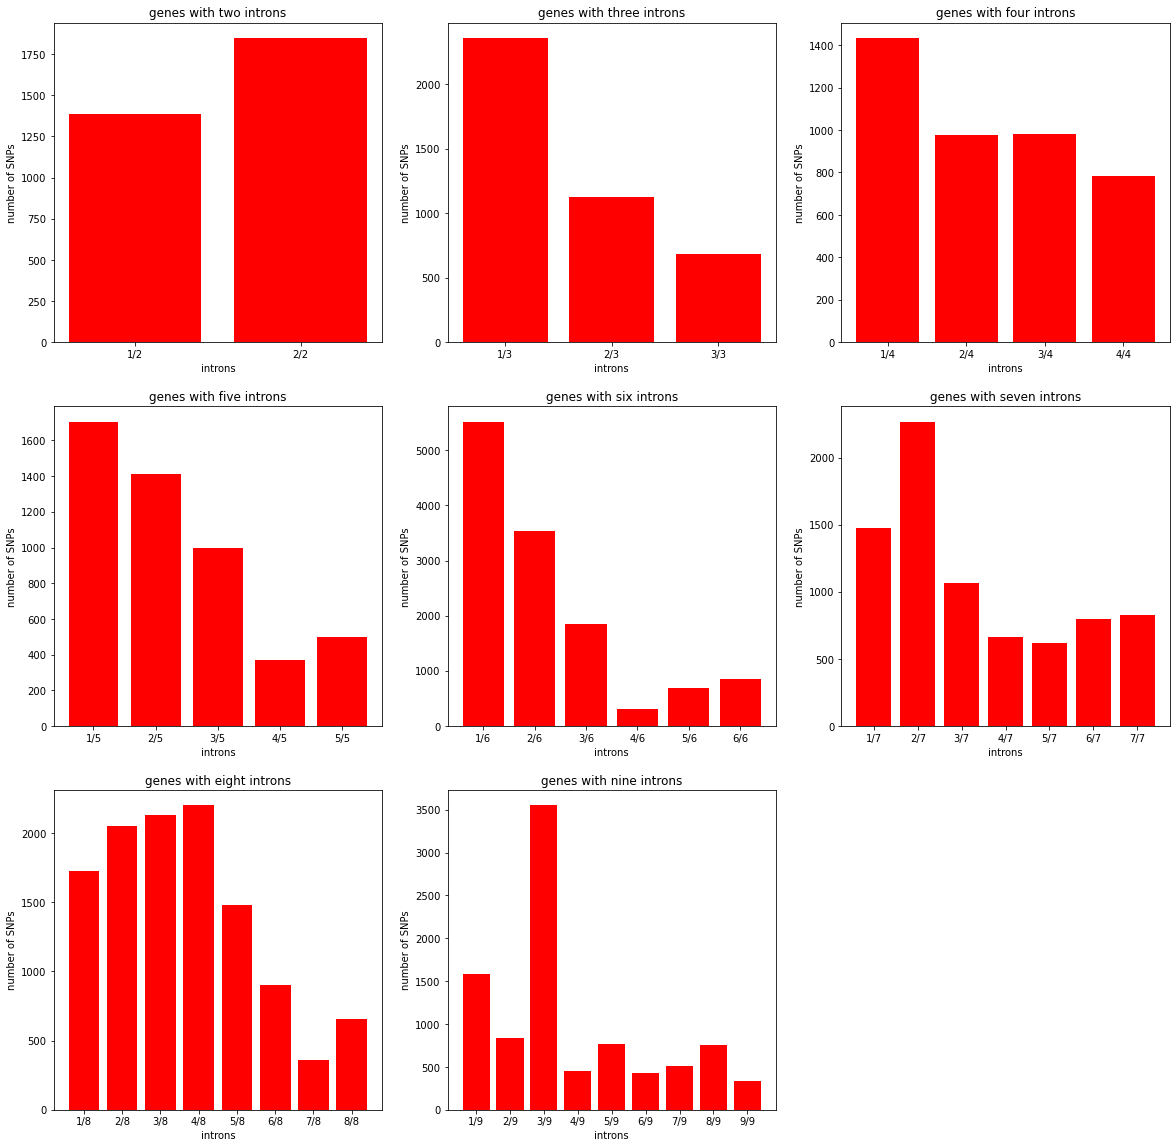

In [15]:
# wizualizacja

from matplotlib import pyplot as plt
from matplotlib import colors


# tworzenie osi odciętych dla kolejnych subplotów
two_introns_x_axis = ["1/2", "2/2"]
three_introns_x_axis = ["1/3", "2/3", "3/3"]
four_introns_x_axis = ["1/4", "2/4", "3/4", "4/4"]
five_introns_x_axis = ["1/5", "2/5", "3/5", "4/5", "5/5"]
six_introns_x_axis = ["1/6", "2/6", "3/6", "4/6", "5/6", "6/6"]
seven_introns_x_axis = ["1/7", "2/7", "3/7", "4/7", "5/7", "6/7", "7/7"]
eight_introns_x_axis = ["1/8", "2/8", "3/8", "4/8", "5/8", "6/8", "7/8", "8/8"]
nine_introns_x_axis = ["1/9", "2/9", "3/9", "4/9", "5/9", "6/9", "7/9", "8/9", "9/9"]

# tworzenie osi rzędnych dla kolejnych subplotów
two_introns_y_axis = [len(intron_1_2), len(intron_2_2)]
three_introns_y_axis = [len(intron_1_3), len(intron_2_3), len(intron_3_3)]
four_introns_y_axis = [len(intron_1_4), len(intron_2_4), len(intron_3_4), len(intron_4_4)]
five_introns_y_axis = [len(intron_1_5), len(intron_2_5), len(intron_3_5), len(intron_4_5), len(intron_5_5)]
six_introns_y_axis = [len(intron_1_6), len(intron_2_6), len(intron_3_6), len(intron_4_6), len(intron_5_6), len(intron_6_6)]
seven_introns_y_axis = [len(intron_1_7), len(intron_2_7), len(intron_3_7), len(intron_4_7), len(intron_5_7), len(intron_6_7), len(intron_7_7)]
eight_introns_y_axis = [len(intron_1_8), len(intron_2_8), len(intron_3_8), len(intron_4_8), len(intron_5_8), len(intron_6_8), len(intron_7_8), len(intron_8_8)]
nine_introns_y_axis = [len(intron_1_9), len(intron_2_9), len(intron_3_9), len(intron_4_9), len(intron_5_9), len(intron_6_9), len(intron_7_9), len(intron_8_9), len(intron_9_9)]


plt.figure(figsize = (20,20))

plt.subplot(3,3,1)
plt.title("genes with two introns")
plt.xlabel("introns")
plt.ylabel("number of SNPs")
plt.bar(two_introns_x_axis, two_introns_y_axis, color = "red")

plt.subplot(3,3,2)
plt.title("genes with three introns")
plt.xlabel("introns")
plt.ylabel("number of SNPs")
plt.bar(three_introns_x_axis, three_introns_y_axis, color = "red")

plt.subplot(3,3,3)
plt.title("genes with four introns")
plt.xlabel("introns")
plt.ylabel("number of SNPs")
plt.bar(four_introns_x_axis, four_introns_y_axis, color = "red")

plt.subplot(3,3,4)
plt.title("genes with five introns")
plt.xlabel("introns")
plt.ylabel("number of SNPs")
plt.bar(five_introns_x_axis, five_introns_y_axis, color = "red")

plt.subplot(3,3,5)
plt.title("genes with six introns")
plt.xlabel("introns")
plt.ylabel("number of SNPs")
plt.bar(six_introns_x_axis, six_introns_y_axis, color = "red")

plt.subplot(3,3,6)
plt.title("genes with seven introns")
plt.xlabel("introns")
plt.ylabel("number of SNPs")
plt.bar(seven_introns_x_axis, seven_introns_y_axis, color = "red")

plt.subplot(3,3,7)
plt.title("genes with eight introns")
plt.xlabel("introns")
plt.ylabel("number of SNPs")
plt.bar(eight_introns_x_axis, eight_introns_y_axis, color = "red")

plt.subplot(3,3,8)
plt.title("genes with nine introns")
plt.xlabel("introns")
plt.ylabel("number of SNPs")
plt.bar(nine_introns_x_axis, nine_introns_y_axis, color = "red")

plt.show()

In [16]:
print(len(intron_3_4))

982


In [17]:
# robienie macierzy

import pandas as pd
import numpy as np

matrix = np.empty((10,9))
column = [0, 1,2,3,4,5,6,7,8,9]
row = [2,3,4,5,6,7,8,9]
matrix.fill(0)



# zapełnianie pierwszego wiersza macierzy_______________________________________________________________________
n = 0
m = 1

for i in row:
    matrix[9,m] = row[n]
    m = m + 1
    n = n + 1


# zapełnianie pierwszej kolumny macierzy________________________________________________________________________________
x = 0
z = -1

for i in column:
    matrix[x,0] = column[z]
    x = x + 1
    z = z -1
    


# długość listy intron_1_2 to 1396 czyli jest 1396 SNPów w takich pozycjach

#matrix[8,1] = len(intron_1_2)

# jak to wykonamy to cała macierz się rozwala
# patrzenie metodą prób i błędów pokazało, że jak do konkretnej komórki w macierzy wlepimy liczbę >1000 to ta macierz się rozwala (1396 > 1000)
# można by liczby SNPów w danym miejscu podzieliź np.przez 100

matrix[8,1] = 100


print(matrix)

# analogicznie, można by było zapełnić resztę macierzy, stosując jakieś pętle

[[  9.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  8.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  7.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  6.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  5.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  4.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  3.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  2.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1. 100.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   2.   3.   4.   5.   6.   7.   8.   9.]]


-usunąć numerację wierszy i kolumn z macierzy (w macierzy są same wartośći)


 Z nowymi danymi:
 
-zrobić to wszystko także dla exonów
-z podziałem na chromosomy oraz potem bez podziału na chromosomy


nowe dane:

/home/users-groups/upwroclaw/Mistrz_MF/short_variants

plik: 12.vcf.gz

eagle



# 2.)  rozkład SNPów w intonach i exonach z podziałem na chromosomy, bez podziału na geny

## ekstrakcja informacji o numerze chromosomu 

In [18]:
vep["Chromosome"] = vep["Location"].str.slice(0,5)   # tworzenie nowej kolumny
print(vep.head())

  #Uploaded_variation     Location Allele                Gene  \
0         rs209547298  Chr29:91976      G  ENSBTAG00000051229   
1     Chr29_91987_G/T  Chr29:91987      T  ENSBTAG00000051229   
2     Chr29_92134_G/A  Chr29:92134      A  ENSBTAG00000051229   
3     Chr29_92139_C/T  Chr29:92139      T  ENSBTAG00000051229   
4     Chr29_92141_A/C  Chr29:92141      C  ENSBTAG00000051229   

              Feature Feature_type  \
0  ENSBTAT00000083496   Transcript   
1  ENSBTAT00000083496   Transcript   
2  ENSBTAT00000083496   Transcript   
3  ENSBTAT00000083496   Transcript   
4  ENSBTAT00000083496   Transcript   

                                    Consequence cDNA_position CDS_position  \
0  intron_variant,non_coding_transcript_variant             -            -   
1  intron_variant,non_coding_transcript_variant             -            -   
2  intron_variant,non_coding_transcript_variant             -            -   
3  intron_variant,non_coding_transcript_variant             -       

## podział na chromosomy

In [19]:
Chr29 = vep[vep["Chromosome"] == "Chr29"]
print(Chr29.head())

  #Uploaded_variation     Location Allele                Gene  \
0         rs209547298  Chr29:91976      G  ENSBTAG00000051229   
1     Chr29_91987_G/T  Chr29:91987      T  ENSBTAG00000051229   
2     Chr29_92134_G/A  Chr29:92134      A  ENSBTAG00000051229   
3     Chr29_92139_C/T  Chr29:92139      T  ENSBTAG00000051229   
4     Chr29_92141_A/C  Chr29:92141      C  ENSBTAG00000051229   

              Feature Feature_type  \
0  ENSBTAT00000083496   Transcript   
1  ENSBTAT00000083496   Transcript   
2  ENSBTAT00000083496   Transcript   
3  ENSBTAT00000083496   Transcript   
4  ENSBTAT00000083496   Transcript   

                                    Consequence cDNA_position CDS_position  \
0  intron_variant,non_coding_transcript_variant             -            -   
1  intron_variant,non_coding_transcript_variant             -            -   
2  intron_variant,non_coding_transcript_variant             -            -   
3  intron_variant,non_coding_transcript_variant             -       

## ekstrakcja informacji o położeniu SNPu

### dla chromosomu 29

In [20]:

Chr29_extra_list = Chr29['Extra'].to_list()
Chr29_introns_and_exons = []

for i in range(0, len(Chr29_extra_list)):
    Chr29_introns_and_exons.append(Chr29_extra_list[i][-10:])
    
#print(Chr29_introns_and_exons)

## odfiltrowanie intronów i exonów

### dla chromosomu 29

#### introny dla chromosomu 29

In [21]:
Chr29_only_introns = list(filter(lambda x: 'INTRON' in x, Chr29_introns_and_exons))

Chr29_intron_positions = []

for i in range(0, len(Chr29_only_introns)):
    Chr29_intron_positions.append(Chr29_only_introns[i][-3:])

#print(Chr29_intron_positions)

#### exony dla chromosomu 29

In [22]:
# exony dla chromosomu 29______________________________________________________________________________________________
Chr29_only_exons = list(filter(lambda x: 'EXON' in x, Chr29_introns_and_exons))

Chr29_exon_positions_raw = []

for i in range(0, len(Chr29_only_exons)):
    Chr29_exon_positions_raw.append(Chr29_only_exons[i][-5:])
    
#print(Chr29_exon_positions_raw)

Chr29_exon_positions_raw_split = []
for n in Chr29_exon_positions_raw:
    Chr29_exon_positions_raw_split.append(n.split("="))

#print(Chr29_exon_positions_raw_split)


Chr29_exon_positions = []

for sublist in Chr29_exon_positions_raw_split:
    if len(sublist) == 2:
        Chr29_exon_positions.append(sublist[1])
    else:
        Chr29_exon_positions.append(sublist[0])
    
print(Chr29_exon_positions)

['2/3', '1/3', '1/3', '1/3', '1/3', '1/3', '1/3', '1/3', '1/3', '5/5', '5/5', '4/5', '1/5', '1/5', '1/5', '20/20', '20/20', '20/20', '19/20', '19/20', '16/20', '16/20', '13/20', '12/20', '12/20', '7/20', '5/20', '1/20', '11/12', '9/12', '9/12', '1/12', '9/9', '9/9', '2/9', '3/6', '6/6', '6/6', '6/6', '6/6', '6/6', '6/6', '1/1', '1/1', '1/1', '21/26', '20/25', '21/26', '20/25', '20/26', '19/25', '18/26', '17/25', '15/26', '14/25', '12/26', '12/25', '11/26', '11/25', '11/26', '11/25', '11/26', '11/25', '11/26', '11/25', '11/26', '11/25', '11/26', '11/25', '11/26', '11/25', '11/26', '11/25', '11/26', '11/25', '11/26', '11/25', '11/26', '11/25', '11/26', '11/25', '10/26', '10/25', '6/26', '6/25', '6/26', '6/25', '1/26', '1/25', '1/26', '1/25', '1/26', '1/25', '1/26', '1/25', '1/26', '1/25', '1/26', '1/25', '1/26', '1/25', '1/26', '1/25', '1/26', '1/25', '1/26', '1/25', '1/26', '1/25', '1/26', '1/25', '1/26', '1/25', '1/26', '1/25', '1/26', '1/25', '1/26', '1/25', '1/26', '1/25', '1/26', '1

## zbieranie informacji o liczbie SNPów w exonach w danej lokalizacji

### dla chromosomu 29 

In [23]:
#for i in Chr29_exon_positions:
    #print(i, len(i))

# liczba exonów w jednośći ==> len = 3
# liczba exonów w dziesiątkach ==> len = 4 lub 5

one = []  # lista SNPów w genach, które mają od 1 do 9 exonów (np. 2/4)
two = []  # lista SNPów w genach, które mają od 10 do 99 exonów (np. 5/23 lub 12/23)

for i in Chr29_exon_positions:
    
    if len(i) == 3:
        one.append(i)
        
    else:
        two.append(i)
print(one)
#print(two)

['2/3', '1/3', '1/3', '1/3', '1/3', '1/3', '1/3', '1/3', '1/3', '5/5', '5/5', '4/5', '1/5', '1/5', '1/5', '9/9', '9/9', '2/9', '3/6', '6/6', '6/6', '6/6', '6/6', '6/6', '6/6', '1/1', '1/1', '1/1', '2/2', '2/2', '1/2', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '1/1', '5/5', '5/5', '5/5', '4/5', '3/5', '3/5', '3/5', '3/5', '3/5', '2/7', '1/5', '2/7', '1/5', '4/7', '3/5', '3/5', '6/7', '4/5', '2/3', '2/3', '2/3', '2/3', '2/3', '3/3', '3/3', '6/6', '6/6', '6/6', '6/6', '3/6', '1/6', '1/6', '1/6', '4/4', '4/4', '4/4', '4/4', '4/4', '4/4', '4/4', '4/4', '4/4', '4/4', '4/4', '3/4', '3/4', '3/4', '3/4', '3/4', '3/4', '3/4', '3/4', '3/4', '3/4', '3/4', '3/4', '3/4', '3/4', '3/4', '3/4', '3/4', '3/4', '3/4', '3/4', '3/4', '3/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '1/5', '1/4', '1/3', '4/5', '3/4', '2/3', '4/5', '3/4', '2/3', '4/5', '3/4', '2/3', '1/2', '1/2', '1/2', '2/2', '2/2', '1/1', '1/1', '1/1'

In [24]:
i = 0
Chr29_number_of_exons_one = []

for position in one:
    Chr29_number_of_exons_one.append(one[i][2])
    i = i + 1

unique_values_one = set(Chr29_number_of_exons_one)
unique_list_one = list(unique_values_one)
unique_list_one.sort()
print(unique_list_one)

['1', '2', '3', '4', '5', '6', '7', '8', '9']


In [25]:
Chr29_number_of_exons_two= []


for element in two:
    element = list(element)
    #print(type(element))

i = 0

for position in two:
    my_str = two[i][2] + two[i][3]
    Chr29_number_of_exons_two.append(my_str)
    i = i + 1
    


unique_values_two = set(Chr29_number_of_exons_two)
unique_list_two = list(unique_values_two)
unique_list_two.sort()
unique_list_two.remove("/1")
unique_list_two.remove("/2")
unique_list_two.remove("/3")
unique_list_two.remove("/4")
unique_list_two.remove("/5")
print(unique_list_one)
print("____________________________________________________________")
print(unique_list_two)

['1', '2', '3', '4', '5', '6', '7', '8', '9']
____________________________________________________________
['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '41', '51']


In [26]:
exon1 = []
exon2 = []
exon3 = []
exon4 = []
exon5 = []
exon6 = []
exon7 = []
exon8 = []
exon9 = []
exon10 = []
exon11 = []
exon12 = []
exon13 = []
exon14 = []
exon15 = []
exon16 = []
exon17 = []
exon18 = []
exon19 = []
exon20 = []
exon21 = []
exon22 = []
exon23 = []
exon24 = []
exon25 = []
exon26 = []
exon27 = []
exon28 = []
exon29 = []
exon30 = []
exon31 = []
exon32 = []
exon33 = []
exon34 = []
exon35 = []
exon36 = []
exon37 = []
exon38 = []
exon39 = []
exon41 = []
exon51 = []

In [27]:
one_mod = []
for m in one:
    c = m.split("/")
    one_mod.append(c)
#print(one_mod)
    

n = 0
for i in one_mod:
    if one_mod[n][1] == "1":
        exon1.append(i)
    elif one_mod[n][1] == "2":
        exon2.append(i)
    elif one_mod[n][1] == "3":
        exon3.append(i)
    elif one_mod[n][1] == "4":
        exon4.append(i)
    elif one_mod[n][1] == "5":
        exon5.append(i)
    elif one_mod[n][1] == "6":
        exon6.append(i)
    elif one_mod[n][1] == "7":
        exon7.append(i)
    elif one_mod[n][1] == "8":
        exon8.append(i)
    else:
        exon9.append(i)
    n = n + 1



In [28]:
two_mod = []
for m in two:
    c = m.split("/")
    two_mod.append(c)
#print(two_mod)

n = 0

for i in two_mod:
    if two_mod[n][1] == "10":
        exon10.append(i)
    elif two_mod[n][1] == "11":
        exon11.append(i)
    elif two_mod[n][1] == "12":
        exon12.append(i)
    elif two_mod[n][1] == "13":
        exon13.append(i)
    elif two_mod[n][1] == "14":
        exon14.append(i)
    elif two_mod[n][1] == "15":
        exon15.append(i)
    elif two_mod[n][1] == "16":
        exon16.append(i)
    elif two_mod[n][1] == "17":
        exon17.append(i)
    elif two_mod[n][1] == "18":
        exon18.append(i)
    elif two_mod[n][1] == "19":
        exon19.append(i)
    elif two_mod[n][1] == "20":
        exon20.append(i)
    elif two_mod[n][1] == "21":
        exon21.append(i)
    elif two_mod[n][1] == "22":
        exon22.append(i)
    elif two_mod[n][1] == "23":
        exon23.append(i)
    elif two_mod[n][1] == "24":
        exon24.append(i)
    elif two_mod[n][1] == "25":
        exon25.append(i)
    elif two_mod[n][1] == "26":
        exon26.append(i)
    elif two_mod[n][1] == "27":
        exon27.append(i)
    elif two_mod[n][1] == "28":
        exon28.append(i)
    elif two_mod[n][1] == "29":
        exon29.append(i)
    elif two_mod[n][1] == "30":
        exon30.append(i)
    elif two_mod[n][1] == "31":
        exon31.append(i)
    elif two_mod[n][1] == "32":
        exon32.append(i)
    elif two_mod[n][1] == "33":
        exon33.append(i)
    elif two_mod[n][1] == "34":
        exon34.append(i)
    elif two_mod[n][1] == "35":
        exon35.append(i)
    elif two_mod[n][1] == "36":
        exon36.append(i)
    elif two_mod[n][1] == "37":
        exon37.append(i)
    elif two_mod[n][1] == "38":
        exon38.append(i)
    elif two_mod[n][1] == "39":
        exon39.append(i)
    elif two_mod[n][1] == "41":
        exon41.append(i)
    else:
        exon51.append(i)
    
    n = n + 1

print(exon2)

[['2', '2'], ['2', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['1', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2', '2'], ['2

In [29]:
exon1_2 = []
exon2_2 = []

n = 0
for i in exon2:
    if exon2[n][0] == "1":
        exon1_2.append(i)
    else:
        exon2_2.append(i)
    n = n + 1

In [30]:
exon1_3 = []
exon2_3 = []
exon3_3 = []

n = 0
for i in exon3:
    if exon3[n][0] == "1":
        exon1_3.append(i)
    elif exon3[n][0] == "2":
        exon2_3.append(i)
    else:
        exon3_3.append(i)
    n = n + 1
    

In [31]:
exon1_4 = []
exon2_4 = []
exon3_4 = []
exon4_4 = []


n = 0
for i in exon4:
    if exon4[n][0] == "1":
        exon1_4.append(i)
    elif exon4[n][0] == "2":
        exon2_4.append(i)
    elif exon4[n][0] == "3":
        exon3_4.append(i)
    else:
        exon4_4.append(i)
    n = n + 1

In [32]:
exon1_5 = []
exon2_5 = []
exon3_5 = []
exon4_5 = []
exon5_5 = []



n = 0
for i in exon5:
    if exon5[n][0] == "1":
        exon1_5.append(i)
    elif exon5[n][0] == "2":
        exon2_5.append(i)
    elif exon5[n][0] == "3":
        exon3_5.append(i)
    elif exon5[n][0] == "4":
        exon4_5.append(i)
    else:
        exon5_5.append(i)
    n = n + 1

In [33]:
exon1_6 = []
exon2_6 = []
exon3_6 = []
exon4_6 = []
exon5_6 = []
exon6_6 = []


n = 0
for i in exon6:
    if exon6[n][0] == "1":
        exon1_6.append(i)
    elif exon6[n][0] == "2":
        exon2_6.append(i)
    elif exon6[n][0] == "3":
        exon3_6.append(i)
    elif exon6[n][0] == "4":
        exon4_6.append(i)
    elif exon6[n][0] == "5":
        exon5_6.append(i)
    else:
        exon6_6.append(i)
    n = n + 1

In [34]:
exon1_7 = []
exon2_7 = []
exon3_7 = []
exon4_7 = []
exon5_7 = []
exon6_7 = []
exon7_7 = []


n = 0
for i in exon7:
    if exon7[n][0] == "1":
        exon1_7.append(i)
    elif exon7[n][0] == "2":
        exon2_7.append(i)
    elif exon7[n][0] == "3":
        exon3_7.append(i)
    elif exon7[n][0] == "4":
        exon4_7.append(i)
    elif exon7[n][0] == "5":
        exon5_7.append(i)
    elif exon7[n][0] == "6":
        exon6_7.append(i)
    else:
        exon7_7.append(i)
    n = n + 1

In [35]:
exon1_8 = []
exon2_8 = []
exon3_8 = []
exon4_8 = []
exon5_8 = []
exon6_8 = []
exon7_8 = []
exon8_8 = []





n = 0
for i in exon8:
    if exon8[n][0] == "1":
        exon1_8.append(i)
    elif exon8[n][0] == "2":
        exon2_8.append(i)
    elif exon8[n][0] == "3":
        exon3_8.append(i)
    elif exon8[n][0] == "4":
        exon4_8.append(i)
    elif exon8[n][0] == "5":
        exon5_8.append(i)
    elif exon8[n][0] == "6":
        exon6_8.append(i)
    elif exon8[n][0] == "7":
        exon7_8.append(i)
    else:
        exon8_8.append(i)
    n = n + 1

In [36]:
exon1_9 = []
exon2_9 = []
exon3_9 = []
exon4_9 = []
exon5_9 = []
exon6_9 = []
exon7_9 = []
exon8_9 = []
exon9_9 = []



n = 0
for i in exon9:
    if exon9[n][0] == "1":
        exon1_9.append(i)
    elif exon9[n][0] == "2":
        exon2_9.append(i)
    elif exon9[n][0] == "3":
        exon3_9.append(i)
    elif exon9[n][0] == "4":
        exon4_9.append(i)
    elif exon9[n][0] == "5":
        exon5_9.append(i)
    elif exon9[n][0] == "6":
        exon6_9.append(i)
    elif exon9[n][0] == "7":
        exon7_9.append(i)
    elif exon9[n][0] == "8":
        exon8_9.append(i)
    else:
        exon9_9.append(i)
    n = n + 1


In [37]:
#print(exon10)


m = 0
exon10_unique = []
for n in exon10:
    exon10_unique.append(exon10[m][0])
    m = m + 1
#print(exon10_unique)


exon10_unique_values = set(exon10_unique)
exon10_unique_list = list(exon10_unique_values)
exon10_unique_list.sort()
#print(exon10_unique_list)

exon1_10 = []
exon2_10 = []
exon3_10 = []
exon4_10 = []
exon5_10 = []
exon6_10 = []
exon7_10 = []
exon8_10 = []
exon9_10 = []
exon10_10 = []



n = 0
for i in exon10:
    if exon10[n][0] == "1":
        exon1_10.append(i)
    elif exon10[n][0] == "2":
        exon2_10.append(i)
    elif exon10[n][0] == "3":
        exon3_10.append(i)
    elif exon10[n][0] == "4":
        exon4_10.append(i)
    elif exon10[n][0] == "5":
        exon5_10.append(i)
    elif exon10[n][0] == "6":
        exon6_10.append(i)
    elif exon10[n][0] == "7":
        exon7_10.append(i)
    elif exon10[n][0] == "8":
        exon8_10.append(i)
    elif exon10[n][0] == "9":
        exon9_10.append(i)
    else:
        exon10_10.append(i)
    n = n + 1

In [38]:
#print(exon11)

m = 0

exon11_unique = []

for n in exon11:
    exon11_unique.append(exon11[m][0])
    m = m + 1



exon11_unique_values = set(exon11_unique)
exon11_unique_list = list(exon11_unique_values)
exon11_unique_list.sort()
print(exon11_unique_list)


exon1_11 = []
exon2_11 = []
exon3_11 = []
exon4_11 = []
exon5_11 = []
exon6_11 = []
exon7_11 = []
exon8_11 = []
exon9_11 = []
exon10_11 = []
exon11_11 = []



n = 0
for i in exon11:
    if exon11[n][0] == "1":
        exon1_11.append(i)
    elif exon11[n][0] == "2":
        exon2_11.append(i)
    elif exon11[n][0] == "3":
        exon3_11.append(i)
    elif exon11[n][0] == "4":
        exon4_11.append(i)
    elif exon11[n][0] == "5":
        exon5_11.append(i)
    elif exon11[n][0] == "6":
        exon6_11.append(i)
    elif exon11[n][0] == "7":
        exon7_11.append(i)
    elif exon10[n][0] == "8":
        exon8_11.append(i)
    elif exon11[n][0] == "9":
        exon9_11.append(i)
    elif exon11[n][0] == "10":
        exon10_11.append(i)
    else:
        exon11_11.append(i)
    n = n + 1

['1', '10', '11', '2', '3', '4', '5', '6', '7', '8', '9']


In [39]:
#print(exon12)

m = 0

exon12_unique = []

for n in exon12:
    exon12_unique.append(exon12[m][0])
    m = m + 1


exon12_unique_values = set(exon12_unique)
exon12_unique_list = list(exon12_unique_values)
exon12_unique_list.sort()
print(exon12_unique_list)


exon1_12 = []
exon2_12 = []
exon3_12 = []
exon4_12 = []
exon5_12 = []
exon6_12 = []
exon7_12 = []
exon8_12 = []
exon9_12 = []
exon10_12 = []
exon11_12 = []
exon12_12 = []



n = 0
for i in exon12:
    if exon12[n][0] == "1":
        exon1_12.append(i)
    elif exon12[n][0] == "2":
        exon2_12.append(i)
    elif exon12[n][0] == "3":
        exon3_12.append(i)
    elif exon12[n][0] == "4":
        exon4_12.append(i)
    elif exon12[n][0] == "5":
        exon5_12.append(i)
    elif exon12[n][0] == "6":
        exon6_12.append(i)
    elif exon12[n][0] == "7":
        exon7_12.append(i)
    elif exon10[n][0] == "8":
        exon8_12.append(i)
    elif exon12[n][0] == "9":
        exon9_12.append(i)
    elif exon12[n][0] == "10":
        exon10_12.append(i)
    elif exon12[n][0] == "11":
        exon11_12.append(i)
    else:
        exon12_12.append(i)
    n = n + 1

['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9']


In [40]:
#print(exon13)

m = 0

exon13_unique = []

for n in exon13:
    exon13_unique.append(exon13[m][0])
    m = m + 1


exon13_unique_values = set(exon13_unique)
exon13_unique_list = list(exon13_unique_values)
exon13_unique_list.sort()
print(exon13_unique_list)


exon1_13 = []
exon2_13 = []
exon3_13 = []
exon4_13 = []
exon5_13 = []
exon6_13 = []
exon7_13 = []
exon8_13 = []
exon9_13 = []
exon10_13 = []
exon11_13 = []
exon12_13 = []
exon13_13 = []



n = 0
for i in exon13:
    if exon13[n][0] == "1":
        exon1_13.append(i)
    elif exon13[n][0] == "2":
        exon2_13.append(i)
    elif exon13[n][0] == "3":
        exon3_13.append(i)
    elif exon13[n][0] == "4":
        exon4_13.append(i)
    elif exon13[n][0] == "5":
        exon5_13.append(i)
    elif exon13[n][0] == "6":
        exon6_13.append(i)
    elif exon13[n][0] == "7":
        exon7_13.append(i)
    elif exon10[n][0] == "8":
        exon8_13.append(i)
    elif exon13[n][0] == "9":
        exon9_13.append(i)
    elif exon13[n][0] == "10":
        exon10_13.append(i)
    elif exon13[n][0] == "11":
        exon11_13.append(i)
    elif exon13[n][0] == "12":
        exon12_13.append(i)
    else:
        exon13_13.append(i)
    n = n + 1

['1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9']


In [41]:
#print(exon14)

m = 0

exon14_unique = []

for n in exon14:
    exon14_unique.append(exon14[m][0])
    m = m + 1


exon14_unique_values = set(exon14_unique)
exon14_unique_list = list(exon14_unique_values)
exon14_unique_list.sort()
print(exon14_unique_list)

exon1_14 = []
exon2_14 = []
exon3_14 = []
exon4_14 = []
exon5_14 = []
exon6_14 = []
exon7_14 = []
exon8_14 = []
exon9_14 = []
exon10_14 = []
exon11_14 = []
exon12_14 = []
exon13_14 = []
exon14_14 = []



n = 0
for i in exon14:
    if exon14[n][0] == "1":
        exon1_14.append(i)
    elif exon14[n][0] == "2":
        exon2_14.append(i)
    elif exon14[n][0] == "3":
        exon3_14.append(i)
    elif exon14[n][0] == "4":
        exon4_14.append(i)
    elif exon14[n][0] == "5":
        exon5_14.append(i)
    elif exon14[n][0] == "6":
        exon6_14.append(i)
    elif exon14[n][0] == "7":
        exon7_14.append(i)
    elif exon10[n][0] == "8":
        exon8_14.append(i)
    elif exon14[n][0] == "9":
        exon9_14.append(i)
    elif exon14[n][0] == "10":
        exon10_14.append(i)
    elif exon14[n][0] == "11":
        exon11_14.append(i)
    elif exon14[n][0] == "12":
        exon12_14.append(i)
    elif exon14[n][0] == "13":
        exon13_14.append(i)
    else:
        exon14_14.append(i)
    n = n + 1

['1', '10', '11', '12', '13', '14', '2', '3', '4', '5', '6', '7', '8', '9']


In [42]:
#print(exon15)

m = 0

unique = []

for n in exon15:
    unique.append(exon15[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)


exon1_15 = []
exon2_15 = []
exon3_15 = []
exon4_15 = []
exon5_15 = []
exon6_15 = []
exon7_15 = []
exon8_15 = []
exon9_15 = []
exon10_15 = []
exon11_15 = []
exon12_15 = []
exon13_15 = []
exon14_15 = []
exon15_15 = []



n = 0
for i in exon15:
    if exon15[n][0] == "1":
        exon1_15.append(i)
    elif exon15[n][0] == "2":
        exon2_15.append(i)
    elif exon15[n][0] == "3":
        exon3_15.append(i)
    elif exon15[n][0] == "4":
        exon4_15.append(i)
    elif exon15[n][0] == "5":
        exon5_15.append(i)
    elif exon15[n][0] == "6":
        exon6_15.append(i)
    elif exon15[n][0] == "7":
        exon7_15.append(i)
    elif exon10[n][0] == "8":
        exon8_15.append(i)
    elif exon15[n][0] == "9":
        exon9_15.append(i)
    elif exon15[n][0] == "10":
        exon10_15.append(i)
    elif exon15[n][0] == "11":
        exon11_15.append(i)
    elif exon15[n][0] == "12":
        exon12_15.append(i)
    elif exon15[n][0] == "13":
        exon13_15.append(i)
    elif exon15[n][0] == "14":
        exon14_15.append(i)
    else:
        exon15_15.append(i)
    n = n + 1

['1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6', '7', '8', '9']


In [43]:
#print(exon16)

m = 0

unique = []

for n in exon16:
    unique.append(exon16[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)


exon1_16 = []
exon2_16 = []
exon3_16 = []
exon4_16 = []
exon5_16 = []
exon6_16 = []
exon7_16 = []
exon8_16 = []
exon9_16 = []
exon10_16 = []
exon11_16 = []
exon12_16 = []
exon13_16 = []
exon14_16 = []
exon15_16 = []
exon16_16 = []



n = 0
for i in exon16:
    if exon16[n][0] == "1":
        exon1_16.append(i)
    elif exon16[n][0] == "2":
        exon2_16.append(i)
    elif exon16[n][0] == "3":
        exon3_16.append(i)
    elif exon16[n][0] == "4":
        exon4_16.append(i)
    elif exon16[n][0] == "5":
        exon5_16.append(i)
    elif exon16[n][0] == "6":
        exon6_16.append(i)
    elif exon16[n][0] == "7":
        exon7_16.append(i)
    elif exon10[n][0] == "8":
        exon8_16.append(i)
    elif exon16[n][0] == "9":
        exon9_16.append(i)
    elif exon16[n][0] == "10":
        exon10_16.append(i)
    elif exon16[n][0] == "11":
        exon11_16.append(i)
    elif exon16[n][0] == "12":
        exon12_16.append(i)
    elif exon16[n][0] == "13":
        exon13_16.append(i)
    elif exon16[n][0] == "14":
        exon14_16.append(i)
    elif exon16[n][0] == "15":
        exon15_16.append(i)
    else:
        exon16_16.append(i)
    n = n + 1

['1', '10', '11', '12', '13', '14', '15', '16', '2', '3', '4', '5', '6', '7', '8', '9']


In [44]:
#print(exon17)

m = 0

unique = []

for n in exon17:
    unique.append(exon17[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

exon1_17 = []
exon2_17 = []
exon3_17 = []
exon4_17 = []
exon5_17 = []
exon6_17 = []
exon7_17 = []
exon8_17 = []
exon9_17 = []
exon10_17 = []
exon11_17 = []
exon12_17 = []
exon13_17 = []
exon14_17 = []
exon15_17 = []
exon16_17 = []
exon17_17 = []



n = 0
for i in exon17:
    if exon17[n][0] == "1":
        exon1_17.append(i)
    elif exon17[n][0] == "2":
        exon2_17.append(i)
    elif exon17[n][0] == "3":
        exon3_17.append(i)
    elif exon17[n][0] == "4":
        exon4_17.append(i)
    elif exon17[n][0] == "5":
        exon5_17.append(i)
    elif exon17[n][0] == "6":
        exon6_17.append(i)
    elif exon17[n][0] == "7":
        exon7_17.append(i)
    elif exon10[n][0] == "8":
        exon8_17.append(i)
    elif exon17[n][0] == "9":
        exon9_17.append(i)
    elif exon17[n][0] == "10":
        exon10_17.append(i)
    elif exon17[n][0] == "11":
        exon11_17.append(i)
    elif exon17[n][0] == "12":
        exon12_17.append(i)
    elif exon17[n][0] == "13":
        exon13_17.append(i)
    elif exon17[n][0] == "14":
        exon14_17.append(i)
    elif exon17[n][0] == "15":
        exon15_17.append(i)
    elif exon17[n][0] == "16":
        exon16_17.append(i)
    else:
        exon17_17.append(i)
    n = n + 1

['1', '10', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', '7', '8', '9']


In [45]:
#print(exon18)

m = 0

unique = []

for n in exon18:
    unique.append(exon18[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)


exon1_18 = []
exon2_18 = []
exon3_18 = []
exon4_18 = []
exon5_18 = []
exon6_18 = []
exon7_18 = []
exon8_18 = []
exon9_18 = []
exon10_18 = []
exon11_18 = []
exon12_18 = []
exon13_18 = []
exon14_18 = []
exon15_18 = []
exon16_18 = []
exon17_18 = []
exon18_18 = []



n = 0
for i in exon18:
    if exon18[n][0] == "1":
        exon1_18.append(i)
    elif exon18[n][0] == "2":
        exon2_18.append(i)
    elif exon18[n][0] == "3":
        exon3_18.append(i)
    elif exon18[n][0] == "4":
        exon4_18.append(i)
    elif exon18[n][0] == "5":
        exon5_18.append(i)
    elif exon18[n][0] == "6":
        exon6_18.append(i)
    elif exon18[n][0] == "7":
        exon7_18.append(i)
    elif exon10[n][0] == "8":
        exon8_18.append(i)
    elif exon18[n][0] == "9":
        exon9_18.append(i)
    elif exon18[n][0] == "10":
        exon10_18.append(i)
    elif exon18[n][0] == "11":
        exon11_18.append(i)
    elif exon18[n][0] == "12":
        exon12_18.append(i)
    elif exon18[n][0] == "13":
        exon13_18.append(i)
    elif exon18[n][0] == "14":
        exon14_18.append(i)
    elif exon18[n][0] == "15":
        exon15_18.append(i)
    elif exon18[n][0] == "16":
        exon16_18.append(i)
    elif exon18[n][0] == "17":
        exon17_18.append(i)
    else:
        exon18_18.append(i)
    n = n + 1

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2', '3', '4', '5', '6', '7', '8', '9']


In [46]:
#print(exon19)

m = 0

unique = []

for n in exon19:
    unique.append(exon15[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

exon1_19 = []
exon2_19 = []
exon3_19 = []
exon4_19 = []
exon5_19 = []
exon6_19 = []
exon7_19 = []
exon8_19 = []
exon9_19 = []
exon10_19 = []
exon11_19 = []
exon12_19 = []
exon13_19 = []
exon14_19 = []
exon15_19 = []
exon16_19 = []
exon17_19 = []
exon18_19 = []
exon19_19 = []



n = 0
for i in exon19:
    if exon19[n][0] == "1":
        exon1_19.append(i)
    elif exon19[n][0] == "2":
        exon2_19.append(i)
    elif exon19[n][0] == "3":
        exon3_19.append(i)
    elif exon19[n][0] == "4":
        exon4_19.append(i)
    elif exon19[n][0] == "5":
        exon5_19.append(i)
    elif exon19[n][0] == "6":
        exon6_19.append(i)
    elif exon19[n][0] == "7":
        exon7_19.append(i)
    elif exon10[n][0] == "8":
        exon8_19.append(i)
    elif exon19[n][0] == "9":
        exon9_19.append(i)
    elif exon19[n][0] == "10":
        exon10_19.append(i)
    elif exon19[n][0] == "11":
        exon11_19.append(i)
    elif exon19[n][0] == "12":
        exon12_19.append(i)
    elif exon19[n][0] == "13":
        exon13_19.append(i)
    elif exon19[n][0] == "14":
        exon14_19.append(i)
    elif exon19[n][0] == "15":
        exon15_19.append(i)
    elif exon19[n][0] == "16":
        exon16_19.append(i)
    elif exon19[n][0] == "17":
        exon17_19.append(i)
    elif exon19[n][0] == "18":
        exon18_19.append(i)
    else:
        exon19_19.append(i)
    n = n + 1

['1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6', '7', '8', '9']


# dalej nie robię, ponieważ jest niewiele genów, które posiadają powyżej 10 exonów

In [47]:
#print(exon20)

m = 0

unique = []

for n in exon20:
    unique.append(exon20[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '3', '4', '5', '7', '8', '9']


In [48]:
#print(exon21)

m = 0

unique = []

for n in exon21:
    unique.append(exon21[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '3', '4', '5', '6', '7', '8', '9']


In [49]:
#print(exon22)

m = 0

unique = []

for n in exon22:
    unique.append(exon22[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '3', '4', '5', '6', '7', '8', '9']


In [50]:
#print(exon23)

m = 0

unique = []

for n in exon23:
    unique.append(exon23[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '3', '4', '5', '6', '7', '8', '9']


In [51]:
#print(exon24)

m = 0

unique = []

for n in exon24:
    unique.append(exon24[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['1', '10', '11', '13', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '3', '4', '5', '6', '7', '8', '9']


In [52]:
#print(exon25)

m = 0

unique = []

for n in exon25:
    unique.append(exon25[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '3', '4', '5', '6', '7', '8', '9']


In [53]:
#print(exon26)

m = 0

unique = []

for n in exon26:
    unique.append(exon26[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '3', '4', '5', '6', '7', '8', '9']


In [54]:
#print(exon27)

m = 0

unique = []

for n in exon27:
    unique.append(exon27[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '3', '4', '5', '6', '7', '8', '9']


In [55]:
#print(exon28)

m = 0

unique = []

for n in exon28:
    unique.append(exon28[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['1', '10', '14', '17', '27', '28', '3']


In [56]:
#print(exon29)

m = 0

unique = []

for n in exon29:
    unique.append(exon29[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['1', '10', '11', '12', '13', '14', '15', '19', '2', '21', '24', '25', '26', '27', '28', '29', '3', '4', '5', '6', '7', '8', '9']


In [57]:
#print(exon30)

m = 0

exon30_unique = []

for n in exon30:
    exon30_unique.append(exon30[m][0])
    m = m + 1


exon30_unique_values = set(exon30_unique)
exon30_unique_list = list(exon30_unique_values)
exon30_unique_list.sort()
print(exon30_unique_list)

['1', '10', '11', '13', '14', '15', '19', '2', '20', '22', '25', '26', '27', '28', '29', '3', '30', '4', '5', '6', '7', '8', '9']


In [58]:
#print(exon31)

m = 0

unique = []

for n in exon31:
    unique.append(exon31[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['1', '10', '11', '12', '14', '15', '2', '20', '22', '23', '26', '27', '28', '29', '3', '30', '31', '4', '5', '6', '7', '8', '9']


In [59]:
#print(exon32)

m = 0

unique = []

for n in exon32:
    unique.append(exon32[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['1', '10', '11', '12', '15', '16', '2', '21', '24', '25', '27', '28', '29', '30', '31', '32', '4', '5', '6', '7', '8', '9']


In [60]:
#print(exon33)

m = 0

unique = []

for n in exon33:
    unique.append(exon33[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '33', '4', '7', '8']


In [61]:
#print(exon34)

m = 0

unique = []

for n in exon34:
    unique.append(exon34[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['21', '25', '26', '27', '28', '34', '9']


In [62]:
#print(exon35)

m = 0

unique = []

for n in exon35:
    unique.append(exon35[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['10', '14', '20', '22', '23', '24', '27', '28', '29', '3', '30', '33', '34', '35', '5', '6', '7', '9']


In [63]:
#print(exon36)

m = 0

unique = []

for n in exon36:
    unique.append(exon36[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['14', '15', '19', '22', '26', '27', '28', '29', '3', '30', '33', '34', '36', '7', '8', '9']


In [64]:
#print(exon37)

m = 0

unique = []

for n in exon37:
    unique.append(exon37[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['1', '11', '14', '15', '16', '23', '24', '37', '5', '8']


In [65]:
#print(exon38)

m = 0

unique = []

for n in exon38:
    unique.append(exon38[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['1', '10', '11', '13', '14', '15', '16', '24', '25', '38', '5', '7', '8']


In [66]:
#print(exon39)

m = 0

unique = []

for n in exon39:
    unique.append(exon39[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['1', '11', '14', '15', '16', '25', '26', '39', '5', '8']


In [67]:
#print(exon41)

m = 0

unique = []

for n in exon41:
    unique.append(exon41[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['13', '14', '15', '16', '2', '20', '27', '28', '3', '38', '41', '5']


In [68]:
#print(exon51)

m = 0

unique = []

for n in exon51:
    unique.append(exon51[m][0])
    m = m + 1


unique_values = set(unique)
unique_list = list(unique_values)
unique_list.sort()
print(unique_list)

['10', '13', '14', '16', '21', '24', '25', '26', '28', '3', '30', '31', '32', '34', '35', '37', '41', '50', '51', '6']


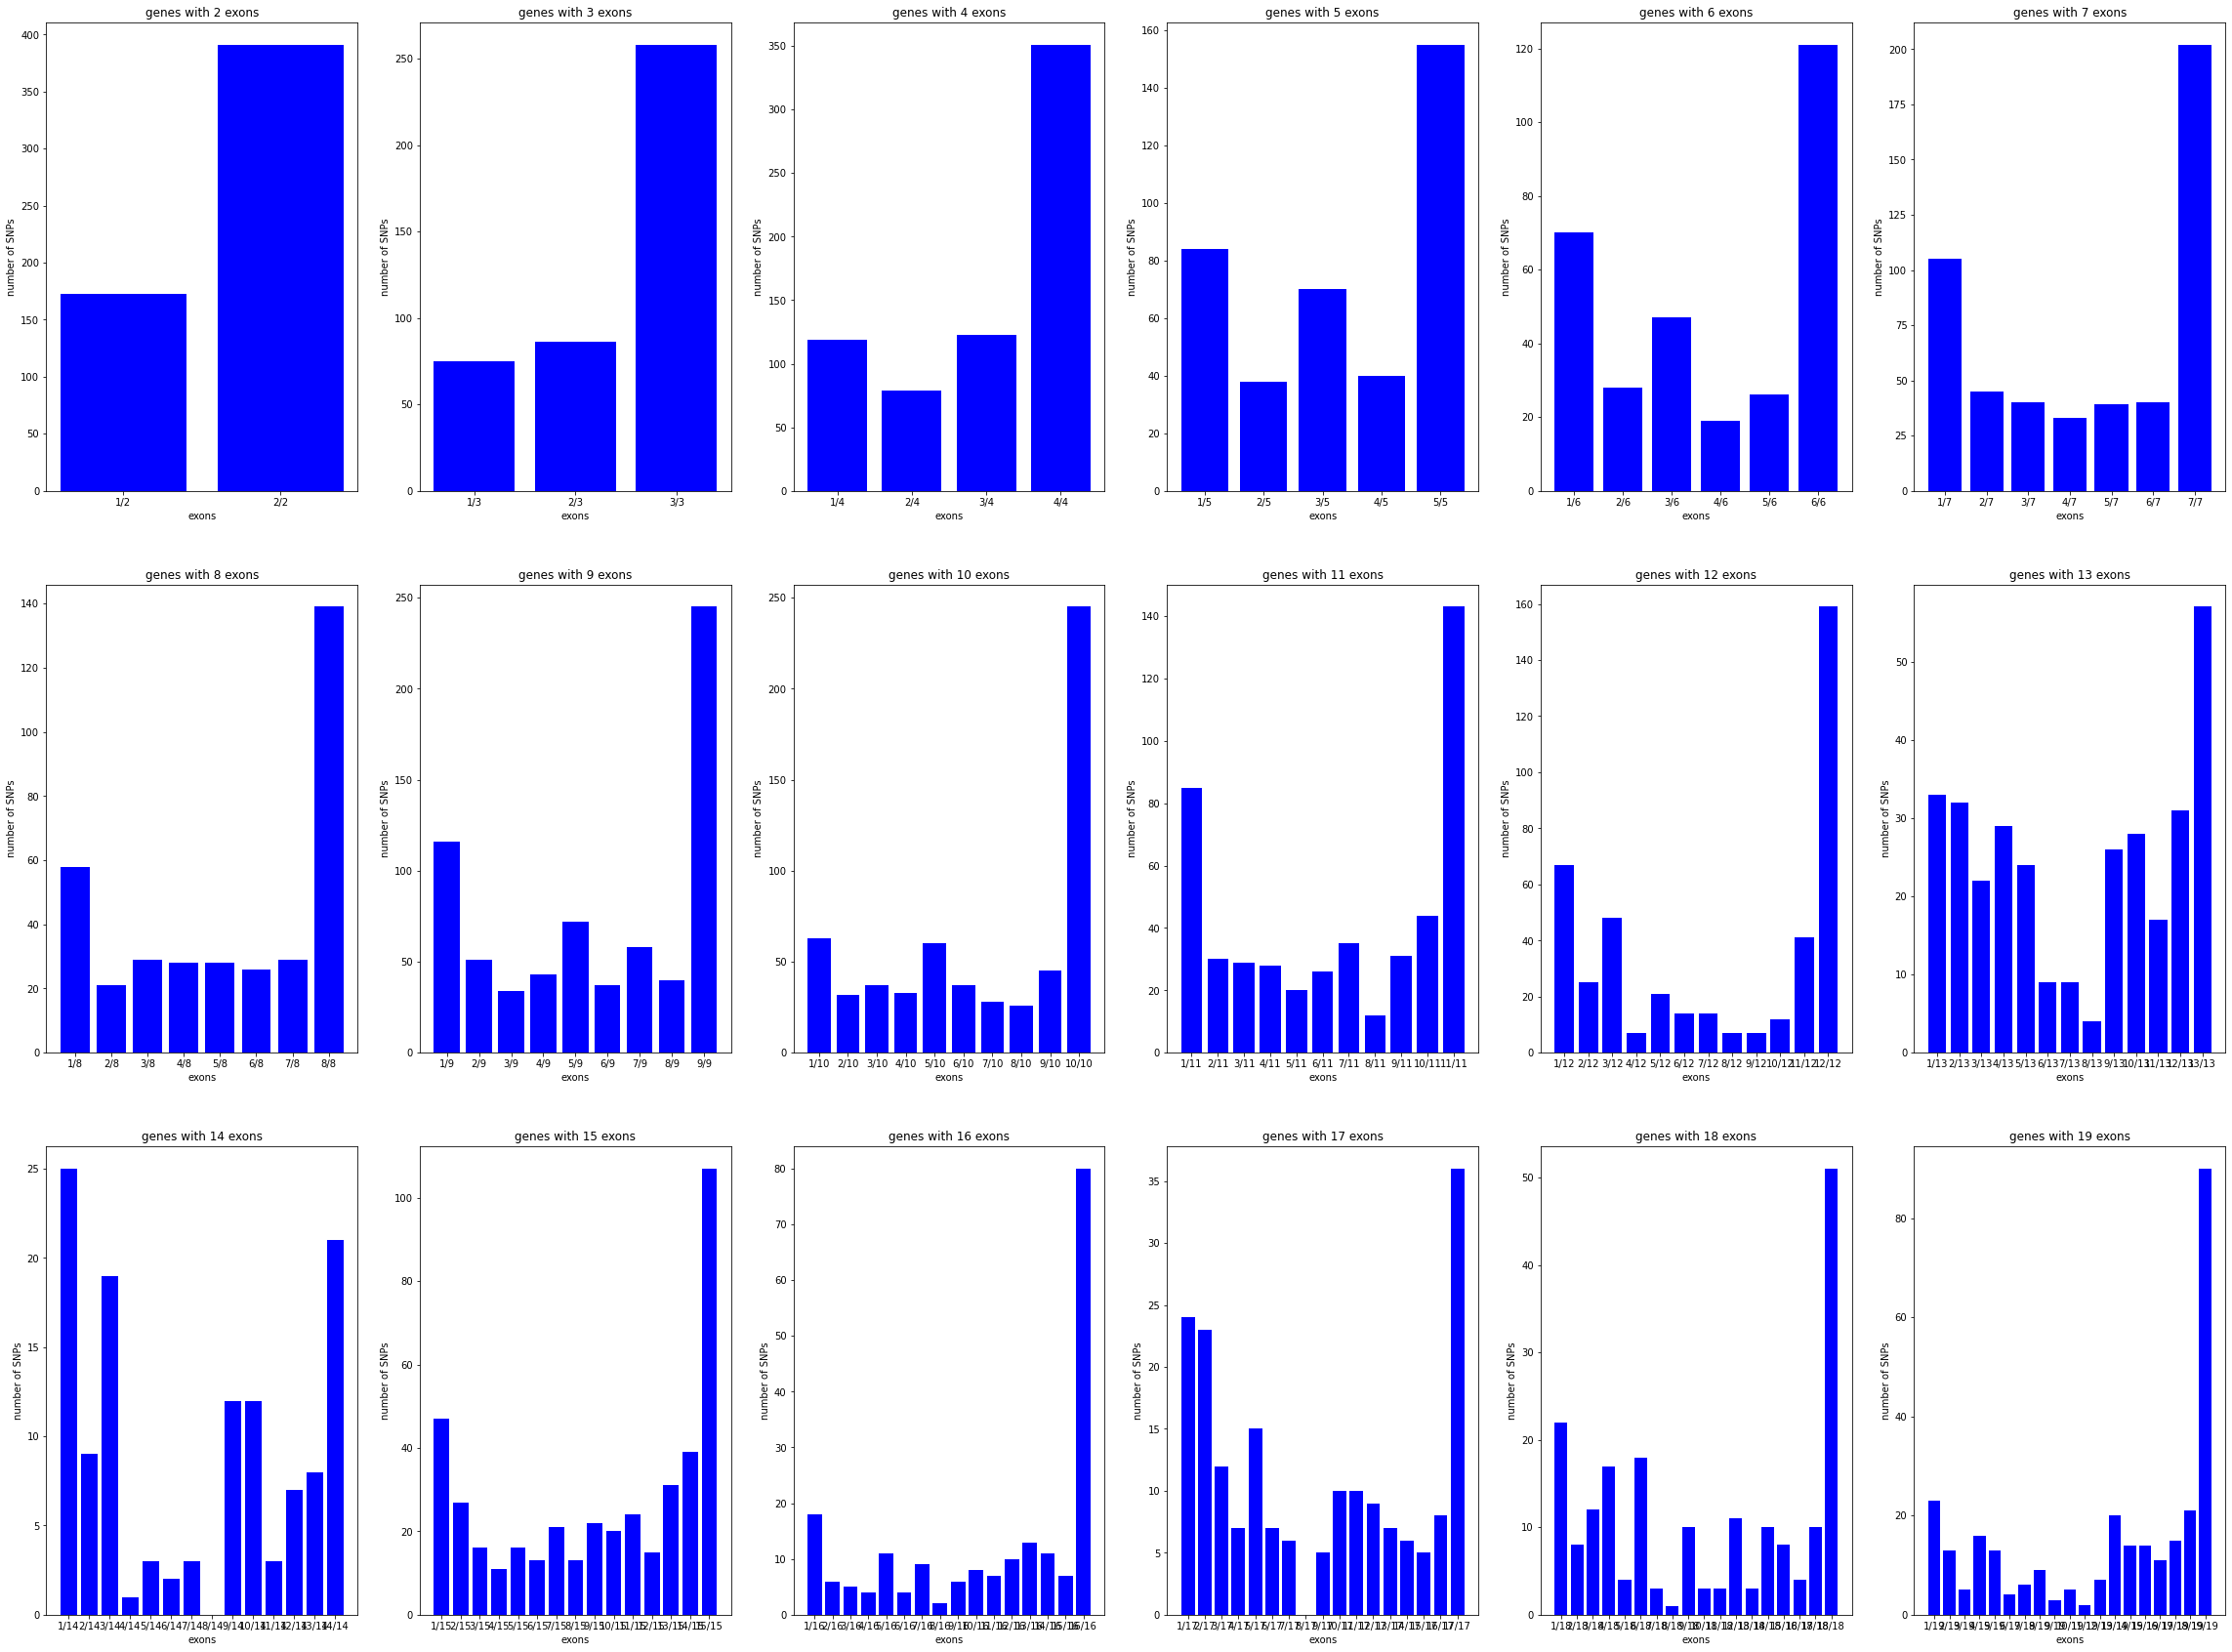

In [79]:
# wizualizacja

from matplotlib import pyplot as plt
from matplotlib import colors




# tworzenie osi odciętych dla kolejnych subplotów
two_exons_x_axis = ["1/2", "2/2"]
three_exons_x_axis = ["1/3", "2/3", "3/3"]
four_exons_x_axis = ["1/4", "2/4", "3/4", "4/4"]
five_exons_x_axis = ["1/5", "2/5", "3/5", "4/5", "5/5"]
six_exons_x_axis = ["1/6", "2/6", "3/6", "4/6", "5/6", "6/6"]
seven_exons_x_axis = ["1/7", "2/7", "3/7", "4/7", "5/7", "6/7", "7/7"]
eight_exons_x_axis = ["1/8", "2/8", "3/8", "4/8", "5/8", "6/8", "7/8", "8/8"]
nine_exons_x_axis = ["1/9", "2/9", "3/9", "4/9", "5/9", "6/9", "7/9", "8/9", "9/9"]
ten_exons_x_axis = ["1/10", "2/10", "3/10", "4/10", "5/10", "6/10", "7/10", "8/10", "9/10", "10/10"]
eleven_exons_x_axis = ["1/11", "2/11", "3/11", "4/11", "5/11", "6/11", "7/11", "8/11", "9/11", "10/11", "11/11"]
twelve_exons_x_axis = ["1/12", "2/12", "3/12", "4/12", "5/12", "6/12", "7/12", "8/12", "9/12", "10/12", "11/12", "12/12"]
thirteen_exons_x_axis = ["1/13", "2/13", "3/13", "4/13", "5/13", "6/13", "7/13", "8/13", "9/13", "10/13", "11/13", "12/13", "13/13"]
fourteen_exons_x_axis = ["1/14", "2/14", "3/14", "4/14", "5/14", "6/14", "7/14", "8/14", "9/14", "10/14", "11/14", "12/14", "13/14", "14/14"]
fifteen_exons_x_axis = ["1/15", "2/15", "3/15", "4/15", "5/15", "6/15", "7/15", "8/15", "9/15", "10/15", "11/15", "12/15", "13/15", "14/15", "15/15"]
sixteen_exons_x_axis = ["1/16", "2/16", "3/16", "4/16", "5/16", "6/16", "7/16", "8/16", "9/16", "10/16", "11/16", "12/16", "13/16", "14/16", "15/16", "16/16"]
seventeen_exons_x_axis = ["1/17", "2/17", "3/17", "4/17", "5/17", "6/17", "7/17", "8/17", "9/17", "10/17", "11/17", "12/17", "13/17", "14/17", "15/17", "16/17", "17/17"]
eighteen_exons_x_axis = ["1/18", "2/18", "3/18", "4/18", "5/18", "6/18", "7/18", "8/18", "9/18", "10/18", "11/18", "12/18", "13/18", "14/18", "15/18", "16/18", "17/18", "18/18"]
nineteen_exons_x_axis = ["1/19", "2/19", "3/19", "4/19", "5/19", "6/19", "7/19", "8/19", "9/19", "10/19", "11/19", "12/19", "13/19", "14/19", "15/19", "16/19", "17/19", "18/19", "19/19"]


# tworzenie osi rzędnych dla kolejnych subplotów
two_exons_y_axis = [len(exon1_2), len(exon2_2)]
three_exons_y_axis = [len(exon1_3), len(exon2_3), len(exon3_3)]
four_exons_y_axis = [len(exon1_4), len(exon2_4), len(exon3_4), len(exon4_4)]
five_exons_y_axis = [len(exon1_5), len(exon2_5), len(exon3_5), len(exon4_5), len(exon5_5)]
six_exons_y_axis = [len(exon1_6), len(exon2_6), len(exon3_6), len(exon4_6), len(exon5_6), len(exon6_6)]
seven_exons_y_axis = [len(exon1_7), len(exon2_7), len(exon3_7), len(exon4_7), len(exon5_7), len(exon6_7), len(exon7_7)]
eight_exons_y_axis = [len(exon1_8), len(exon2_8), len(exon3_8), len(exon4_8), len(exon5_8), len(exon6_8), len(exon7_8), len(exon8_8)]
nine_exons_y_axis = [len(exon1_9), len(exon2_9), len(exon3_9), len(exon4_9), len(exon5_9), len(exon6_9), len(exon7_9), len(exon8_9), len(exon9_9)]
ten_exons_y_axis = [len(exon1_10), len(exon2_10), len(exon3_10), len(exon4_10), len(exon5_10), len(exon6_10), len(exon7_10), len(exon8_10), len(exon9_10), len(exon10_10)]
eleven_exons_y_axis = [len(exon1_11), len(exon2_11), len(exon3_11), len(exon4_11), len(exon5_11), len(exon6_11), len(exon7_11), len(exon8_11), len(exon9_11), len(exon10_11), len(exon11_11)]
twelve_exons_y_axis = [len(exon1_12), len(exon2_12), len(exon3_12), len(exon4_12), len(exon5_12), len(exon6_12), len(exon7_12), len(exon8_12), len(exon9_12), len(exon10_12), len(exon11_12), len(exon12_12)]
thirteen_exons_y_axis = [len(exon1_13), len(exon2_13), len(exon3_13), len(exon4_13), len(exon5_13), len(exon6_13), len(exon7_13), len(exon8_13), len(exon9_13), len(exon10_13), len(exon11_13), len(exon12_13), len(exon13_13)]
fourteen_exons_y_axis = [len(exon1_14), len(exon2_14), len(exon3_14), len(exon4_14), len(exon5_14), len(exon6_14), len(exon7_14), len(exon8_14), len(exon9_14), len(exon10_14), len(exon11_14), len(exon12_14), len(exon13_14), len(exon14_14)]
fifteen_exons_y_axis = [len(exon1_15), len(exon2_15), len(exon3_15), len(exon4_15), len(exon5_15), len(exon6_15), len(exon7_15), len(exon8_15), len(exon9_15), len(exon10_15), len(exon11_15), len(exon12_15), len(exon13_15), len(exon14_15), len(exon15_15)]
sixteen_exons_y_axis = [len(exon1_16), len(exon2_16), len(exon3_16), len(exon4_16), len(exon5_16), len(exon6_16), len(exon7_16), len(exon8_16), len(exon9_16), len(exon10_16), len(exon11_16), len(exon12_16), len(exon13_16), len(exon14_16), len(exon15_16), len(exon16_16)]
seventeen_exons_y_axis = [len(exon1_17), len(exon2_17), len(exon3_17), len(exon4_17), len(exon5_17), len(exon6_17), len(exon7_17), len(exon8_17), len(exon9_17), len(exon10_17), len(exon11_17), len(exon12_17), len(exon13_17), len(exon14_17), len(exon15_17), len(exon16_17), len(exon17_17)]
eighteen_exons_y_axis = [len(exon1_18), len(exon2_18), len(exon3_18), len(exon4_18), len(exon5_18), len(exon6_18), len(exon7_18), len(exon8_18), len(exon9_18), len(exon10_18), len(exon11_18), len(exon12_18), len(exon13_18), len(exon14_18), len(exon15_18), len(exon16_18), len(exon17_18), len(exon18_18)]
nineteen_exons_y_axis = [len(exon1_19), len(exon2_19), len(exon3_19), len(exon4_19), len(exon5_19), len(exon6_19), len(exon7_19), len(exon8_19), len(exon9_19), len(exon10_19), len(exon11_19), len(exon12_19), len(exon13_19), len(exon14_19), len(exon15_19), len(exon16_19), len(exon17_19), len(exon18_19), len(exon19_19)]



plt.figure(figsize = (40,30))

plt.subplot(3,6,1)
plt.title("genes with 2 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(two_exons_x_axis, two_exons_y_axis, color = "blue")

plt.subplot(3,6,2)
plt.title("genes with 3 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(three_exons_x_axis, three_exons_y_axis, color = "blue")

plt.subplot(3,6,3)
plt.title("genes with 4 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(four_exons_x_axis, four_exons_y_axis, color = "blue")

plt.subplot(3,6,4)
plt.title("genes with 5 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(five_exons_x_axis, five_exons_y_axis, color = "blue")

plt.subplot(3,6,5)
plt.title("genes with 6 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(six_exons_x_axis, six_exons_y_axis, color = "blue")

plt.subplot(3,6,6)
plt.title("genes with 7 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(seven_exons_x_axis, seven_exons_y_axis, color = "blue")

plt.subplot(3,6,7)
plt.title("genes with 8 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(eight_exons_x_axis, eight_exons_y_axis, color = "blue")

plt.subplot(3,6,8)
plt.title("genes with 9 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(nine_exons_x_axis, nine_exons_y_axis, color = "blue")

plt.subplot(3,6,9)
plt.title("genes with 10 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(ten_exons_x_axis, ten_exons_y_axis, color = "blue")

plt.subplot(3,6,10)
plt.title("genes with 11 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(eleven_exons_x_axis, eleven_exons_y_axis, color = "blue")

plt.subplot(3,6,11)
plt.title("genes with 12 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(twelve_exons_x_axis, twelve_exons_y_axis, color = "blue")

plt.subplot(3,6,11)
plt.title("genes with 12 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(twelve_exons_x_axis, twelve_exons_y_axis, color = "blue")

plt.subplot(3,6,12)
plt.title("genes with 13 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(thirteen_exons_x_axis, thirteen_exons_y_axis, color = "blue")

plt.subplot(3,6,13)
plt.title("genes with 14 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(fourteen_exons_x_axis, fourteen_exons_y_axis, color = "blue")

plt.subplot(3,6,14)
plt.title("genes with 15 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(fifteen_exons_x_axis, fifteen_exons_y_axis, color = "blue")

plt.subplot(3,6,15)
plt.title("genes with 16 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(sixteen_exons_x_axis, sixteen_exons_y_axis, color = "blue")

plt.subplot(3,6,16)
plt.title("genes with 17 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(seventeen_exons_x_axis, seventeen_exons_y_axis, color = "blue")

plt.subplot(3,6,17)
plt.title("genes with 18 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(eighteen_exons_x_axis, eighteen_exons_y_axis, color = "blue")

plt.subplot(3,6,18)
plt.title("genes with 19 exons")
plt.xlabel("exons")
plt.ylabel("number of SNPs")
plt.bar(nineteen_exons_x_axis, nineteen_exons_y_axis, color = "blue")

plt.show()